In [1]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
test = pd.read_csv('data/raw/test.csv').copy()
train = pd.read_csv('data/raw/train.csv')

In [3]:
test_base = test
train_base = train

In [4]:
train.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [5]:
train.shape

(8693, 14)

In [6]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

# Data discription

**PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

**HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.

**CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

**Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

**Destination** - The planet the passenger will be debarking to.

**Age** - The age of the passenger.

**VIP** - Whether the passenger has paid for special VIP service during the voyage.

**RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

**Name** - The first and last names of the passenger.

**Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

# Категориальные признаки

В датасете есть численные и категориальные признаки. Выделим категориальные => map casting.

In [7]:
cat_cols = [
    'HomePlanet',
    'Destination',
]

for col in cat_cols:
    print(f'{col} DISTRIBUTION in TRAIN')
    print(train[col].value_counts())
    print(f'{col} DISTRIBUTION in TEST')
    print(test[col].value_counts())
    print()
    

HomePlanet DISTRIBUTION in TRAIN
HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64
HomePlanet DISTRIBUTION in TEST
HomePlanet
Earth     2263
Europa    1002
Mars       925
Name: count, dtype: int64

Destination DISTRIBUTION in TRAIN
Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64
Destination DISTRIBUTION in TEST
Destination
TRAPPIST-1e      2956
55 Cancri e       841
PSO J318.5-22     388
Name: count, dtype: int64



In [8]:
all_data = [train, test]

map_HomePlanet = {'Earth': 1, 'Europa': 2,'Mars': 3}  
map_Destination = {'TRAPPIST-1e': 1, '55 Cancri e': 2,'PSO J318.5-22': 3}  

for dataset in all_data:
    dataset['HomePlanet'] = dataset['HomePlanet'].map(map_HomePlanet)
    dataset['Destination'] = dataset['Destination'].map(map_Destination)

# Name

Не несёт смысла для анализа, удалим столбец

In [9]:
train = train.drop('Name', axis = 1)
test = test.drop('Name', axis = 1)

# Cabin и PassengerId

Cabin - The cabin number where the passenger is staying. Takes the form **deck/num/side**, where side can be either P for Port or S for Starboard.

A unique Id for each passenger. Each Id takes the form **gggg_pp** where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always

Попробуем разбить на эти столбцы, проанализировать новые признаки


In [10]:
all_data = [train,test]
for dataset in all_data:
    dataset[["Deck", "Cabin_num", "Side"]] = dataset["Cabin"].str.split("/", expand=True)
    dataset[["Pass_group", "Pass_num"]] = dataset["PassengerId"].str.split("_", expand=True)


train['Transported'] = train['Transported'].astype(int)
train['Pass_group'] = train['Pass_group'].astype(int)

train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side,Pass_group,Pass_num
0,0001_01,2.0,False,B/0/P,1.0,39.0,False,0.0,0.0,0.0,0.0,0.0,0,B,0,P,1,01
1,0002_01,1.0,False,F/0/S,1.0,24.0,False,109.0,9.0,25.0,549.0,44.0,1,F,0,S,2,01
2,0003_01,2.0,False,A/0/S,1.0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S,3,01
3,0003_02,2.0,False,A/0/S,1.0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S,3,02
4,0004_01,1.0,False,F/1/S,1.0,16.0,False,303.0,70.0,151.0,565.0,2.0,1,F,1,S,4,01


# Символьные столбцы: map casting

In [11]:
train[['Deck', 'Transported']].groupby('Deck').mean()

,Transported
Deck,
A,0.496094
B,0.734275
C,0.680054
D,0.433054
E,0.357306
F,0.439871
G,0.516217
T,0.200000


In [12]:
train[['Side', 'Transported']].groupby('Side').mean()

,Transported
Side,
P,0.451260
S,0.555037


In [13]:
all_decks = train.Deck.dropna().unique()
num = list(range(len(all_decks)))
deck_mapping = dict(zip(all_decks, num))

all_sides = train.Side.dropna().unique()
num = list(range(len(all_sides)))
side_map = dict(zip(all_sides, num))


tf_map = {False: 0,True: 1}

all_data = [train,test]
for dataset in all_data:
    dataset["Deck"] = dataset["Deck"].map(deck_mapping)
    dataset["Side"] = dataset["Side"].map(side_map)
    dataset["CryoSleep"] = dataset["CryoSleep"].map(tf_map)
    dataset["VIP"] = dataset["VIP"].map(tf_map)

train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side,Pass_group,Pass_num
0,0001_01,2.0,0.0,B/0/P,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,1,01
1,0002_01,1.0,0.0,F/0/S,1.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1,1.0,0,1.0,2,01
2,0003_01,2.0,0.0,A/0/S,1.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0,2.0,0,1.0,3,01
3,0003_02,2.0,0.0,A/0/S,1.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0,2.0,0,1.0,3,02
4,0004_01,1.0,0.0,F/1/S,1.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1,1.0,1,1.0,4,01


<Axes: >

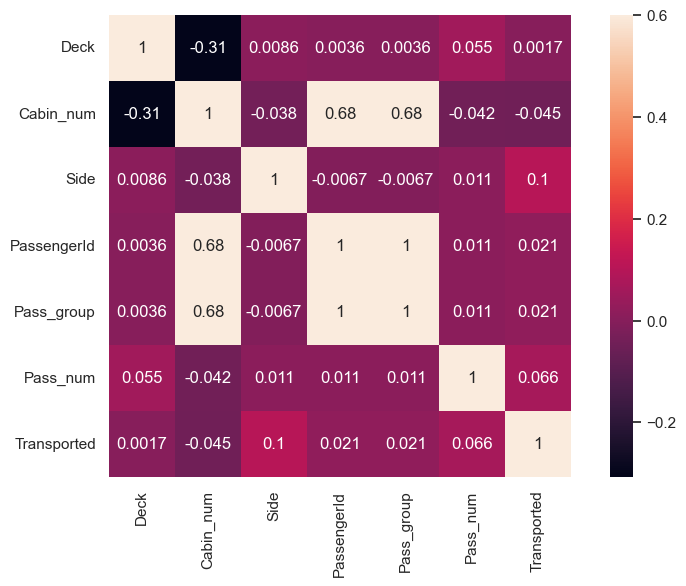

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(train[["Deck", "Cabin_num", "Side",'PassengerId','Pass_group','Pass_num', 'Transported']].corr(), vmax=0.6, square=True, annot=True)

Видим, что для определения кабины лучшая корреляция с Transparent у поля **Side**. Оставим только его: desk и cabin numder попробуем исключить.

Для описания Passenger Id достаточно описания группы(Pass_group) - между ними корреляция = 1

In [15]:
f_to_drop = ['Cabin', 'Deck','Cabin_num','PassengerId', 'Pass_num']
train = train.drop(f_to_drop, axis = 1)
test = test.drop(f_to_drop, axis = 1)

In [16]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Side,Pass_group
0,2.0,0.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1
1,1.0,0.0,1.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1,1.0,2
2,2.0,0.0,1.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0,1.0,3
3,2.0,0.0,1.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0,1.0,3
4,1.0,0.0,1.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1,1.0,4


# Корреляция до заполнения нулей

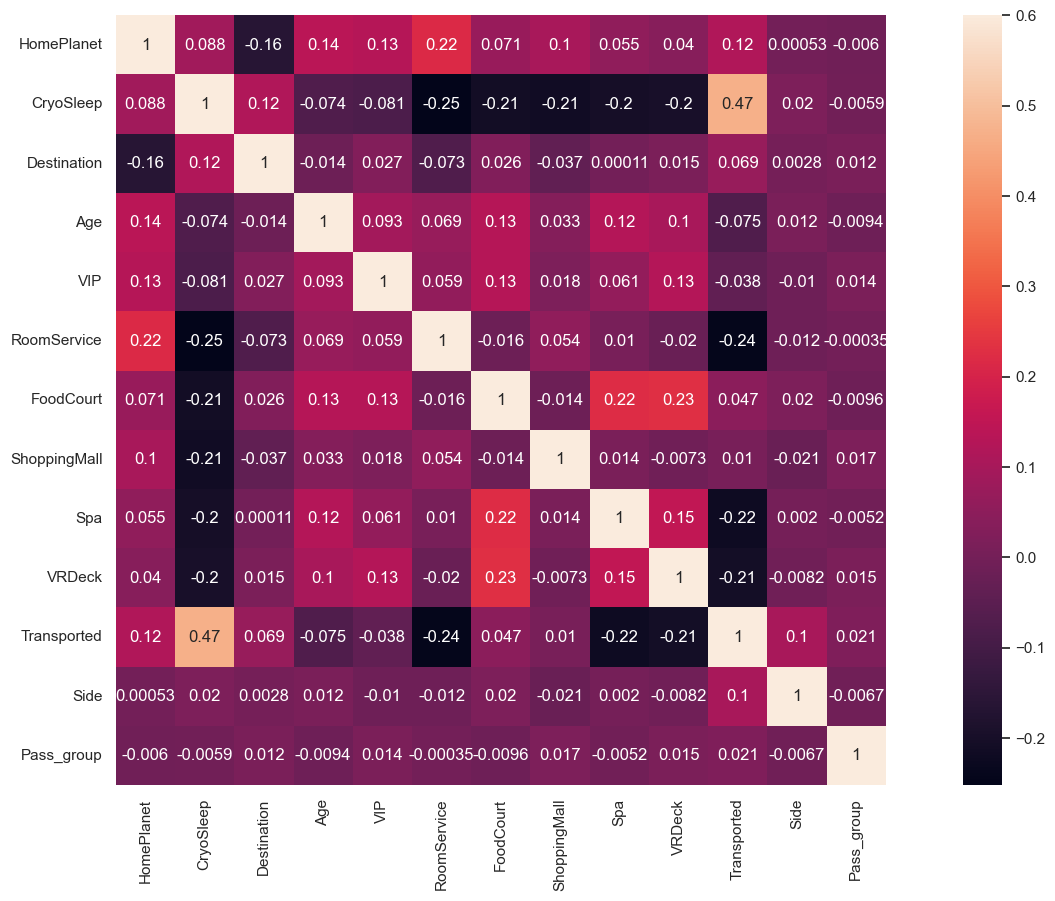

In [17]:
plt.figure(figsize=(20, 10))
sns.heatmap(train.corr(),vmax=0.6, square=True, annot=True)
None

Видим, что у Pass_group низкая корреляция со всеми абрибутами -> нет выраженных зависимостей -> уберём его

In [18]:
train = train.drop('Pass_group', axis = 1)
test = test.drop('Pass_group', axis = 1)

In [19]:
from sklearn.impute import KNNImputer


imputer=KNNImputer(n_neighbors=5)
imputer.fit(train)
X1 = imputer.transform(train)
train = pd.DataFrame(X1,columns = train.columns)


imputer.fit(test)
X1 = imputer.transform(test)
test = pd.DataFrame(X1,columns = test.columns)



# Корреляция после заполнения нулей

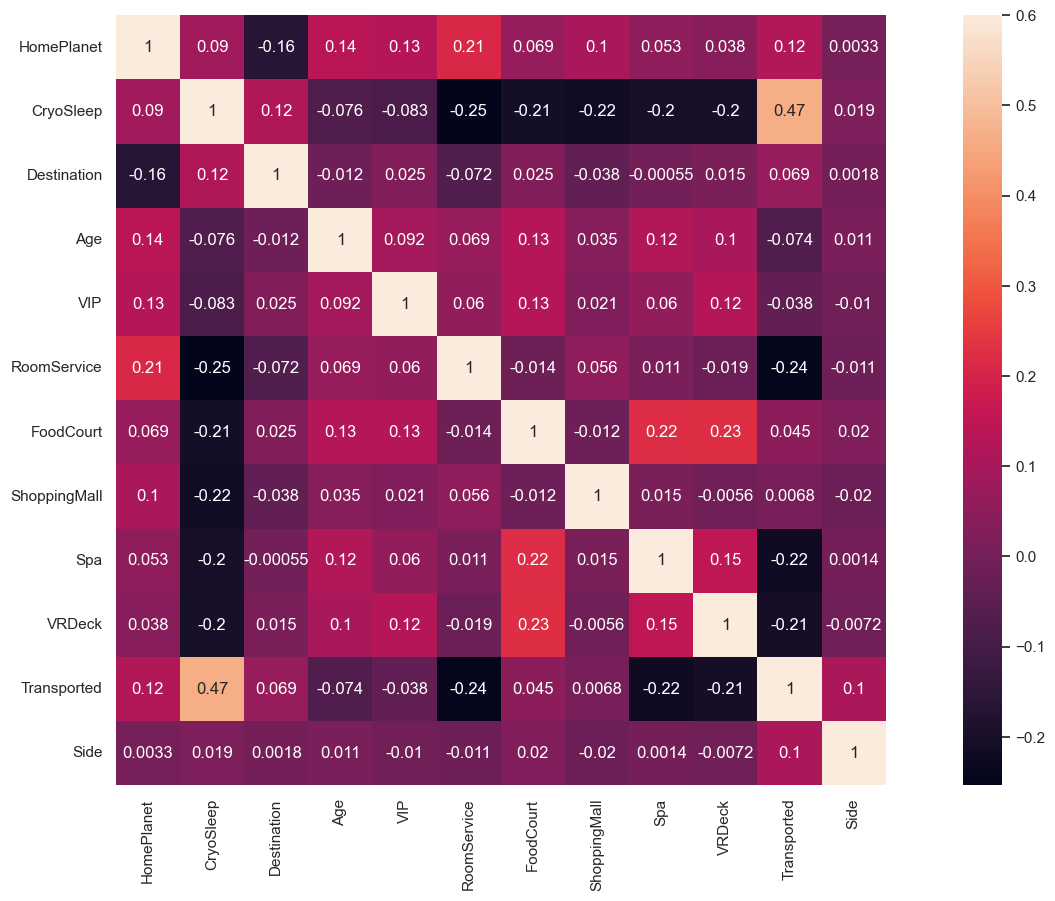

In [20]:
plt.figure(figsize=(20, 10))
sns.heatmap(train.corr(),vmax=0.6, square=True, annot=True)
None

In [21]:
import os

In [22]:
output_train = os.path.join("data", "prepared", "train_prep.csv")
output_test = os.path.join("data", "prepared", "test_prep.csv")

fd_out_train = open(output_train, "w", encoding="utf-8")
fd_out_test = open(output_test, "w", encoding="utf-8")

fd_out_train.write(train.to_csv())
fd_out_test.write(test.to_csv())

fd_out_train.close()
fd_out_test.close()